In [2]:
import pandas as pd
import numpy as np
import math

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import plotly.graph_objs as go
from plotly.colors import n_colors

import os
import re

In [3]:
tissues = pd.read_csv(os.path.join(os.getcwd(), 'app/static/data/rnaseq_tissues_tmm.tsv'), sep='\t', index_col='gene_name')
symbiosis = pd.read_csv(os.path.join(os.getcwd(), 'app/static/data/rnaseq_symbiosis_tmm.tsv'), sep='\t', index_col='gene_name')

# Operate all +0.05 if 0 and all log2
tissues = tissues.applymap(lambda x: x + 0.05 if x == 0 else x)
tissues = tissues.applymap(lambda x: round(math.log2(x), 3))

symbiosis = symbiosis.applymap(lambda x: x + 0.05 if x == 0 else x)
symbiosis = symbiosis.applymap(lambda x: round(math.log2(x), 3))

tissues.to_csv('rnaseq_tissues_log2_tmm.tsv', sep='\t')
symbiosis.to_csv('rnaseq_symbiosis_log2_tmm.tsv', sep='\t')

In [4]:
tissues_log2 = pd.read_csv(os.path.join(os.getcwd(), 'app/static/data/rnaseq_tissues_log2_tmm.tsv'), sep='\t', index_col='gene_name')
symbiosis_log2 = pd.read_csv(os.path.join(os.getcwd(), 'app/static/data/rnaseq_symbiosis_log2_tmm.tsv'), sep='\t', index_col='gene_name')

print(tissues_log2)
print(symbiosis_log2)

                 leaf_bud-1  leaf_bud-2  leaf_bud-3  large_pod-1  large_pod-2  \
gene_name                                                                       
Medtr0001s0010       -1.737       0.379       0.000        0.379        1.632   
Medtr0001s0070       -4.322      -4.322      -4.322       -4.322       -4.322   
Medtr0001s0100       -4.322      -4.322      -4.322       -4.322       -4.322   
Medtr0001s0120        0.485      -0.152      -0.737       -4.322       -4.322   
Medtr0001s0160       -1.000      -1.737       1.000       -4.322       -4.322   
...                     ...         ...         ...          ...          ...   
MT4Noble_057470       1.926       2.406       2.104        2.070        2.459   
MT4Noble_057510      -4.322      -4.322      -4.322       -4.322       -4.322   
MT4Noble_057552       3.336       4.154       4.027        2.293        3.379   
MT4Noble_057580      -4.322      -4.322      -4.322       -4.322       -4.322   
MT4Noble_057610       2.293 

In [6]:
tissues = pd.read_csv(os.path.join(os.getcwd(), 'app/static/data/rnaseq_tissues_tmm.tsv'), sep='\t', index_col='gene_name')
symbiosis = pd.read_csv(os.path.join(os.getcwd(), 'app/static/data/rnaseq_symbiosis_tmm.tsv'), sep='\t', index_col='gene_name')

print(tissues)
print(symbiosis)

                 leaf_bud-1  leaf_bud-2  leaf_bud-3  large_pod-1  large_pod-2  \
gene_name                                                                       
Medtr0001s0010          0.3         1.3         1.0          1.3          3.1   
Medtr0001s0070          0.0         0.0         0.0          0.0          0.0   
Medtr0001s0100          0.0         0.0         0.0          0.0          0.0   
Medtr0001s0120          1.4         0.9         0.6          0.0          0.0   
Medtr0001s0160          0.5         0.3         2.0          0.0          0.0   
...                     ...         ...         ...          ...          ...   
MT4Noble_057470         3.8         5.3         4.3          4.2          5.5   
MT4Noble_057510         0.0         0.0         0.0          0.0          0.0   
MT4Noble_057552        10.1        17.8        16.3          4.9         10.4   
MT4Noble_057580         0.0         0.0         0.0          0.0          0.0   
MT4Noble_057610         4.9 

In [12]:
tissues = pd.read_csv(os.path.join(os.getcwd(), 'app/static/data/rnaseq_tissues_tmm.tsv'), sep='\t', index_col='gene_name')
symbiosis = pd.read_csv(os.path.join(os.getcwd(), 'app/static/data/rnaseq_symbiosis_tmm.tsv'), sep='\t', index_col='gene_name')

gene_name = 'Medtr3g065980'

expression_t = tissues.loc[gene_name]
ticks_t = np.unique([re.sub(r'(?is)-.+', '', col) for col in tissues.columns])
data = {t: np.average([val for item, val in expression_t.items() if item.__contains__(t + '-')]) for t in ticks_t}

expression_s = symbiosis.loc[gene_name]
ticks_s = np.unique([re.sub(r'(?is)-.+', '', col) for col in symbiosis.columns])
data.update({t: np.average([val for item, val in expression_s.items() if item.__contains__(t + '-')]) for t in ticks_s})
data.update({'intra_nodule': 0})

def rgb_to_hex(rbg):
    data = [int(float(e)) for e in rbg.split(',')]
    return '#%02x%02x%02x' % (data[0], data[1], data[2])

non_zero = [i for i in data.values() if i > 0]
cmap = ['rgb(255, 255, 255)'] + n_colors('rgb(255, 255, 0)', 'rgb(255, 0, 0)', len(non_zero), 'rgb')
cmap = [rgb.replace('rgb', '').replace('(', '').replace(')', '') for rgb in cmap]
cmap = [rgb_to_hex(rgb) for rgb in cmap]

fig = go.Figure()

for i, c in enumerate(cmap):
    fig.add_bar(
        x=l(sorted(data.values())),
        y=[int(max(l(data.values())))]
        , marker_color=c,
        name=sorted(data.values())[i],
        showlegend=False,
        hovertemplate=' ',
        text=sorted(data.values())[i]
    )

fig.update_xaxes(visible=False)
fig.update_layout(barmode='stack', width=250, plot_bgcolor='#F3F3F2')
fig.show()

svg_colors = {e[0] + '_fill': cmap.pop(0) for i, e in enumerate(sorted(data.items(), key=lambda kv: (kv[1], kv[0]))) if e[1] > 0}
svg_colors.update({k + '_fill': '#ffffff' for k, v in data.items() if v <= 0})

print(svg_colors)

{'large_pod_fill': '#ffffff', 'nitrate_nodule_48h_fill': '#ffff00', 'root_fill': '#ffee00', 'nodule_0d_fill': '#ffdd00', 'flower_fill': '#ffcc00', 'nodule_4d_fill': '#ffbb00', 'nitrate_nodule_12h_fill': '#ffaa00', 'mature_nodule_fill': '#ff9900', 'nodule_10d_fill': '#ff8800', 'medium_pod_fill': '#ff7700', 'nodule_14d_fill': '#ff6600', 'small_pod_fill': '#ff5500', 'leaf_bud_fill': '#ff4400', 'petiole_fill': '#ff3300', 'leaf_fill': '#ff2200', 'stem_fill': '#ff1100', 'intra_nodule_fill': '#ffffff'}


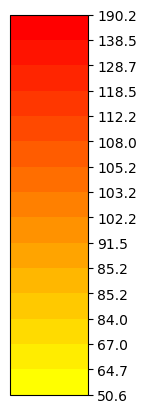

In [99]:
fig, ax = plt.subplots(figsize=(1, 10))
fig.subplots_adjust(bottom=.5)

cmap = cm.autumn_r
bounds = sorted(l(data.values()))
norm = colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap=cmap),
    orientation='vertical',
    ticks=bounds,
    cax=ax
)
plt.show()

In [ ]:
    def init_efp(self, gene_name, norm='tmm'):
        """
        Computes the eFP methods to colour each tissue with its corresponding expression value.
        """

        if gene_name != '':
            expression_t = self.tissues_tmm.loc[gene_name] if norm == 'tmm' else self.tissues_log2_tmm.loc[gene_name]

            ticks_t = np.unique([re.sub(r'(?is)-.+', '', col) for col in self.tissues_tmm.columns])
            self.data = {
                t: round(np.average([val for item, val in expression_t.items() if item.__contains__(t + '-')]), 2)
                for t in ticks_t
            }

            expression_s = self.symbiosis_tmm.loc[gene_name] if norm == 'tmm' else self.symbiosis_log2_tmm.loc[gene_name]
            ticks_s = np.unique([re.sub(r'(?is)-.+', '', col) for col in self.symbiosis_tmm.columns])
            self.data.update({
                t: round(np.average([val for item, val in expression_s.items() if item.__contains__(t + '-')]), 2)
                for t in ticks_s
            })
            self.data.update({'intra_nodule': 0})

            return self.tmm_efp(self.data) if norm == 'tmm' else self.log2_tmm_efp(self.data)

        self.fig = None
        return self.init_colors()

    def tmm_efp(self, data):
        non_zero = [i for i in data.values() if i > 0]
        cmap = ['rgb(255, 255, 255)'] + n_colors('rgb(255, 255, 0)', 'rgb(255, 0, 0)', len(non_zero), 'rgb')
        cmap = [self.rgb_to_hex(rgb) for rgb in cmap]

        self.fig = self.init_legend(cmap, non_zero, 'tmm')

        cmap.pop(0)
        svg_colors = {e[0] + '_fill': cmap.pop(0) for i, e in enumerate(sorted(data.items(), key=lambda kv: (kv[1], kv[0]))) if e[1] > 0}
        svg_colors.update({k + '_fill': '#ffffff' for k, v in data.items() if v <= 0})
        return svg_colors

    def log2_tmm_efp(self, data):
        cmap = ['rgb(255, 255, 255)'] + n_colors('rgb(0, 0, 255)', 'rgb(255, 0, 0)', len(self.data) - 1, 'rgb')
        cmap = [self.rgb_to_hex(rgb) for rgb in cmap]

        self.fig = self.init_legend(cmap, data.values(), 'log2_tmm')

        cmap.pop(0)
        svg_colors = {e[0] + '_fill': cmap.pop(0) for i, e in enumerate(sorted(data.items(), key=lambda kv: (kv[1], kv[0]))) if e[1] != 0}
        svg_colors.update({k + '_fill': '#ffffff' for k, v in data.items() if v == 0})
        return svg_colors

    @staticmethod
    def rgb_to_hex(rgb):
        rgb = rgb.replace('rgb', '').replace('(', '').replace(')', '')
        rgb = [int(float(e)) for e in rgb.split(',')]
        return '#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2])

    def init_legend(self, cmap, non_zero, norm):
    """
    Creates the eFP legend colormap.
    """

    fig = go.Figure()

    aux = sorted(non_zero + [0]) if norm == 'tmm' else sorted(non_zero)
    for i, c in enumerate(cmap):
        name = aux.pop(0)
        fig.add_bar(
            x=l(sorted(self.data.values())), y=[1], marker_color=c,
            name=name, text=name, textposition='inside',
            showlegend=False, hovertemplate=' '
        )

    fig.update_xaxes(visible=False).update_yaxes(visible=False)
    fig.update_layout(
        barmode='stack', width=300, height=500,
        plot_bgcolor='#F3F3F2', paper_bgcolor='#F3F3F2',
        dragmode=False,
        title=f'Expression value ({norm})'
    )
    return fig

In [7]:
l = [
    'Achom et. al.',
    'Afkhami et. al.',
    'Benezech et. al.',
    'Boscari et. al.',
    'Boschiero et. al.',
    'C de Bang et. al.',
    'C de Bang et. al.'
]
l.sort()
print(l)

['Achom et. al.', 'Afkhami et. al.', 'Benezech et. al.', 'Boscari et. al.', 'Boschiero et. al.', 'C de Bang et. al.', 'C de Bang et. al.']
